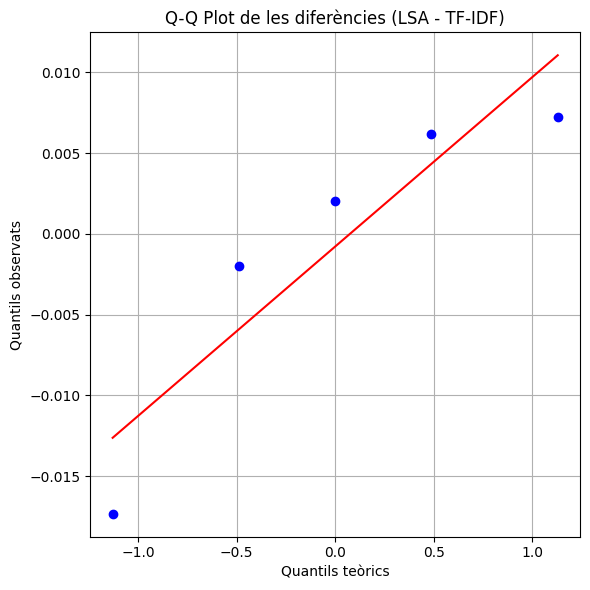

In [1]:
# Importació de llibreries per a càlcul numèric, estadística i gràfics

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd  # ← Necessari per crear la taula final

# Valors reals d'AUC-ROC per a dos models: TF-IDF i LSA
# (cada llista conté els resultats per a 5 folds de validació creuada)
auc_tfidf = [
    0.9806632124352331, 
    0.9831778929188255, 
    0.9831206314984179, 
    0.9789825086066001, 
    0.9868484195152484
]

auc_lsa = [
    0.9878916437736899, 
    0.9658552700212122, 
    0.9892756546232223, 
    0.9810224525043177, 
    0.9848497409326425
]

# Càlcul de les diferències parell a parell entre LSA i TF-IDF
# (per observar quin model ofereix millors resultats en cada fold)

diferencies = [a - b for a, b in zip(auc_lsa, auc_tfidf)]

# Q-Q Plot: comprovació gràfica de la normalitat de les diferències
# Aquest gràfic compara els quantils observats amb els d’una distribució normal teòrica

plt.figure(figsize=(6, 6))
stats.probplot(diferencies, dist="norm", plot=plt)
plt.title("Q-Q Plot de les diferències (LSA - TF-IDF)")
plt.xlabel("Quantils teòrics")
plt.ylabel("Quantils observats")
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:

# Càlcul del test t de Student per dades aparellades (ttest_rel)
# Objectiu: comprovar si la diferència mitjana entre LSA i TF-IDF és estadísticament significativa

from scipy.stats import ttest_rel


# Aplicació del test t aparellat per comparar LSA vs TF-IDF
t_statistic_real, p_value_real = ttest_rel(auc_lsa, auc_tfidf)

# Creació d’una taula comparativa amb les mètriques i diferències

df_real = pd.DataFrame({
    "Fold": list(range(1, 6)),  # Nombres de particions (folds)
    "AUC_TFIDF": auc_tfidf,  # Resultats TF-IDF
    "AUC_LSA": auc_lsa,      # Resultats LSA
    "Diferència (LSA - TF-IDF)": [a - b for a, b in zip(auc_lsa, auc_tfidf)]
})

# Resultat final del test t
# t_statistic_real: valor de la t
# p_value_real: valor p associat (serveix per decidir si la diferència és significativa)

t_statistic_real, p_value_real


(np.float64(-0.17534719041601277), np.float64(0.8693252600712034))